Supermarket Sales Data Analysis 

Importing Necessary Libraries

In [389]:
import matplotlib.pyplot as plt
import os
import pandas as pd

# Let's do Data Cleaning

In [390]:
all_data = pd.read_csv('supermarket_sales.csv')
all_data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [391]:
# CHECKING IF I HAD NULL VALUES
nan_data = all_data[all_data.isna().any(axis = 1)]
nan_data

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating


# Finding types of data

In [392]:
# GETTING INFO ABOUT OUR DATABASE
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [393]:
# GETTING THE TYPES OF DATA WE HAVE IN EACH COLUMN
all_data.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

#Lets now start with analysis questions to ponder

# 1. Total Sales Revenue over the entire dataset period

In [394]:
all_data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [395]:
# We create first a month column 
# Convert 'Date' column to string format
all_data['Date'] = all_data['Date'].astype(str)

# Extract the month from the 'Date' column
all_data['Month'] = all_data['Date'].str[0:1]

# Convert the 'Month' column to integer format
all_data['Month'] = all_data['Month'].astype('int32')

# Display the first 20 rows
print(all_data.head())


    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  \
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1   
1  1

In [396]:
# Doing the grouping so as to get the sales revenue from the entire dataset
all_data['Date'] = pd.to_datetime(all_data['Date'])
results = all_data.groupby('Month')['Total'].sum()

In [397]:
results.head()

Month
1    116291.868
2     97219.374
3    109455.507
Name: Total, dtype: float64

Text(0.5, 1.0, 'Monthly Sales')

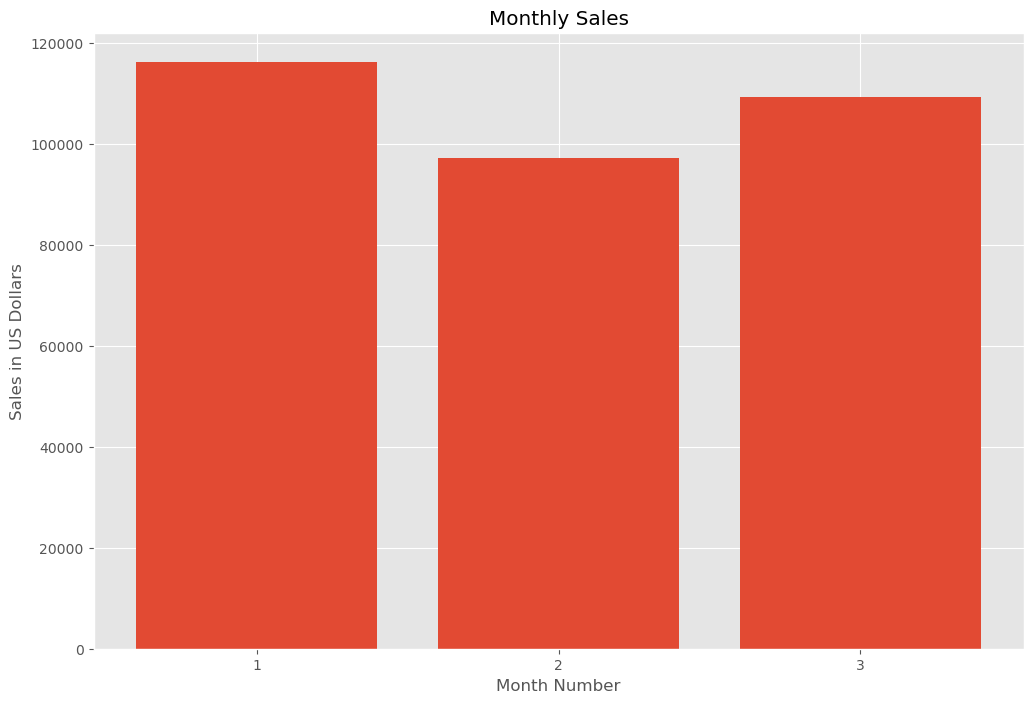

In [398]:
import matplotlib.pyplot as plt

all_data['Date'] = pd.to_datetime(all_data['Date'])
results = all_data.groupby('Month')['Total'].sum()

# Extract sales data for each month
sales = results

# Define months as a list of integers representing month numbers
months = range(1, 4)

# Plotting the bar chart
plt.bar( months, sales)

# Set the x-axis ticks to correspond to months
plt.xticks(months)

# Labeling the axes and title
plt.ylabel('Sales in US Dollars')
plt.xlabel('Month Number')
plt.title('Monthly Sales')

# 2. What are the top selling products in terms of revenue and product sold

In [399]:
all_data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,3
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,3
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,1
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,2


In [400]:
all_data['Date'] = pd.to_datetime(all_data['Date'])
result = all_data.groupby('Product line')['Total'].sum()

In [401]:
result.head()

Product line
Electronic accessories    54337.5315
Fashion accessories       54305.8950
Food and beverages        56144.8440
Health and beauty         49193.7390
Home and lifestyle        53861.9130
Name: Total, dtype: float64

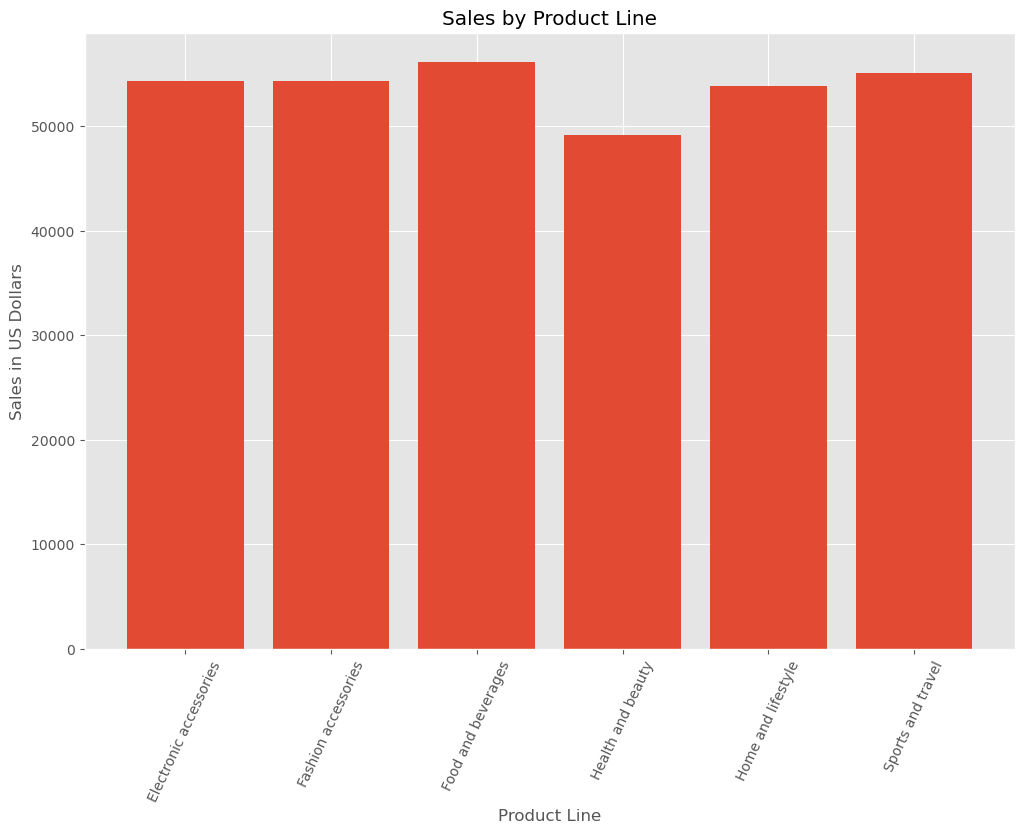

In [402]:
import matplotlib.pyplot as plt

# Extracting sales data for each product line
sales = result
product_lines = [product for product, df in all_data.groupby('Product line')]

# Plotting the bar chart
plt.bar(product_lines, sales)

# Rotate the x-axis labels for better readability
plt.xticks(product_lines, rotation = 65)

# Labelling the axes and title 
plt.ylabel('Sales in US Dollars')
plt.xlabel('Product Line')
plt.title('Sales by Product Line')

# Display the plot
plt.show()

#Digging deeper to find FOOD AND BEVERAGES are the most sold products

In [403]:
all_data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,3
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,3
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,1
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,2


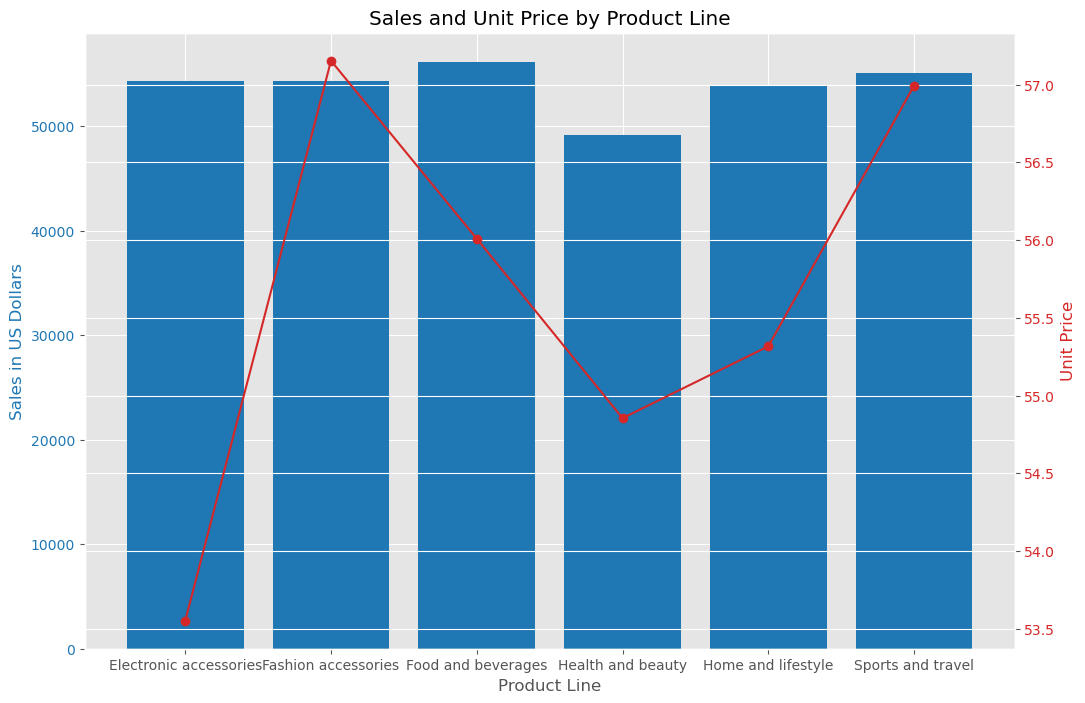

In [404]:
import matplotlib.pyplot as plt

# Extracting sales data for each product line
sales = result
product_lines = [product for product, df in all_data.groupby('Product line')]

# Plotting the bar chart for sales
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Product Line')
ax1.set_ylabel('Sales in US Dollars', color=color)
ax1.bar(product_lines, sales, color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Creating a line chart for unit price
ax2 = ax1.twinx()  
unit_prices = all_data.groupby('Product line')['Unit price'].mean()
color = 'tab:red'
ax2.set_ylabel('Unit Price', color=color)
ax2.plot(product_lines, unit_prices, color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)

# Rotating the x-axis labels
plt.xticks(product_lines, rotation=65)

# Adding title
plt.title('Sales and Unit Price by Product Line')

# Display the plot
plt.show()


In [405]:
# Average Sales of each Product line
grouped_data = all_data.groupby('Product line')['Total'].mean().reset_index()
grouped_data

,Product line,Total
0,Electronic accessories,319.632538
1,Fashion accessories,305.089298
2,Food and beverages,322.671517
3,Health and beauty,323.643020
4,Home and lifestyle,336.636956
5,Sports and travel,332.065220


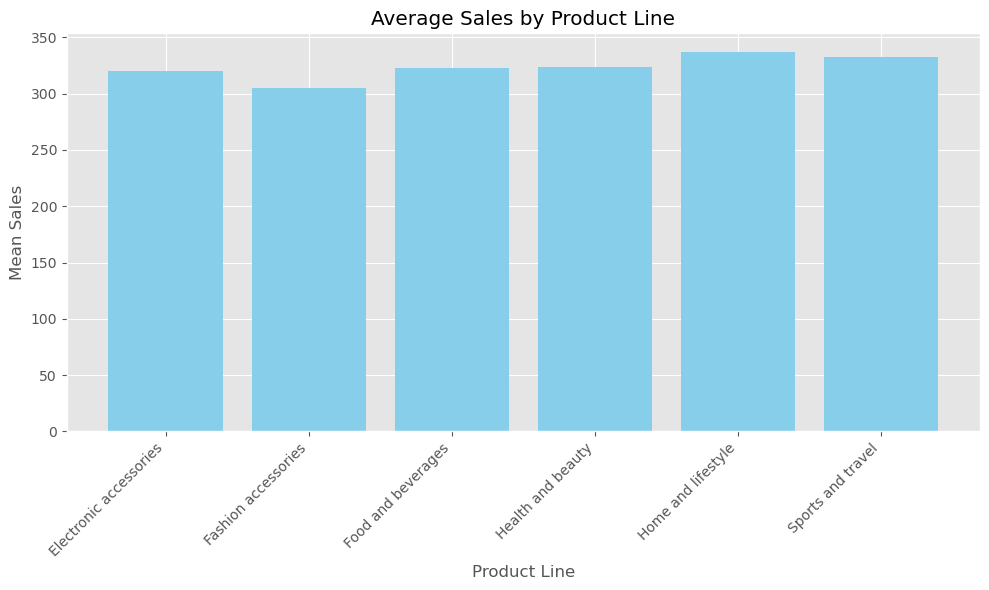

In [406]:
all_data['Sales'] = pd.to_numeric(all_data['Total'], errors = 'coerce')
mean_sales = all_data['Sales'].mean()

# Group by a categorical variable (e.g., 'Product line') and calculate the mean sales for each group
grouped_data = all_data.groupby('Product line')['Total'].mean().reset_index()

# Plotting the mean sales for each group
plt.figure(figsize=(10, 6))
plt.bar(grouped_data['Product line'], grouped_data['Total'], color='skyblue')
plt.xlabel('Product Line')
plt.ylabel('Mean Sales')
plt.title('Average Sales by Product Line')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


# 3. What is the average sales revenue per month

In [407]:
all_data['Date'] = pd.to_datetime(all_data['Date'])

all_data['Month'] = all_data['Date'].dt.month

all_data['Total'] = pd.to_numeric(all_data['Total'], errors = 'coerce')

# Group by month and calculate the mean sales for each month
mean_sales_per_month = all_data.groupby('Month')['Sales'].mean()
mean_sales_per_month

Month
1    330.374625
2    320.856020
3    317.262339
Name: Sales, dtype: float64

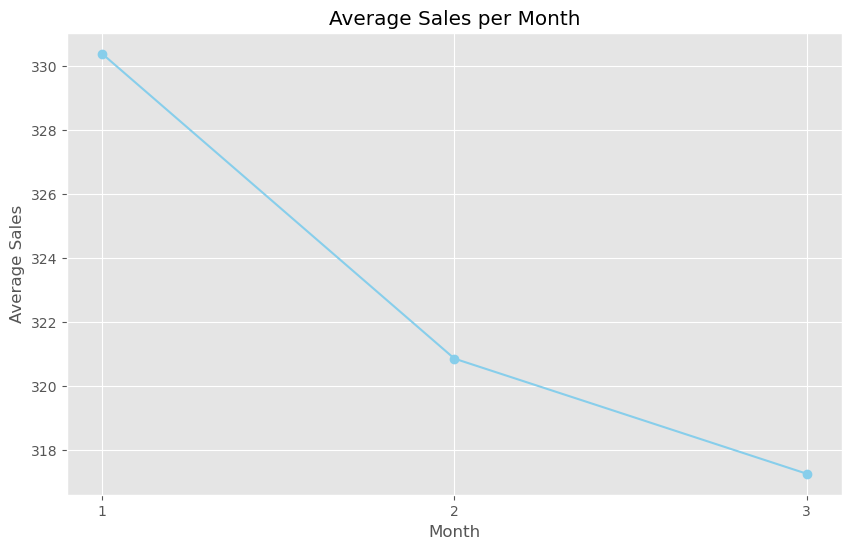

In [408]:
# ASSUMING 'DATE' COLUMN IS IN DATETIME FORMAT
all_data['Date'] = pd.to_datetime(all_data['Date'])

# Extracting month from the 'Date' column
all_data['Month'] = all_data['Date'].dt.month

# Convert 'Sales' column to numeric data type
all_data['Total'] = pd.to_numeric(all_data['Total'], errors = 'coerce')

# Group by month and calculate the mean sales for each month
mean_sales_per_month = all_data.groupby('Month')['Sales'].mean()

# Plotting the average sales per month
plt.figure(figsize=(10,6))
plt.plot(mean_sales_per_month.index, mean_sales_per_month.values, marker = 'o', color='skyblue', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.title('Average Sales per Month')
plt.xticks(range(1, 4))
plt.grid(True)
plt.show()

# 4. What is the distribution of Sales Transactions By Customer Type? 

In [409]:
all_data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month,Sales
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,1,548.9715
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,3,80.2200
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,3,340.5255
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,1,489.0480
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,2,634.3785


In [410]:
all_data['Date'] = pd.to_datetime(all_data['Date'])
customer = all_data.groupby('Customer type')['Sales'].sum()
customer

Customer type
Member    164223.444
Normal    158743.305
Name: Sales, dtype: float64

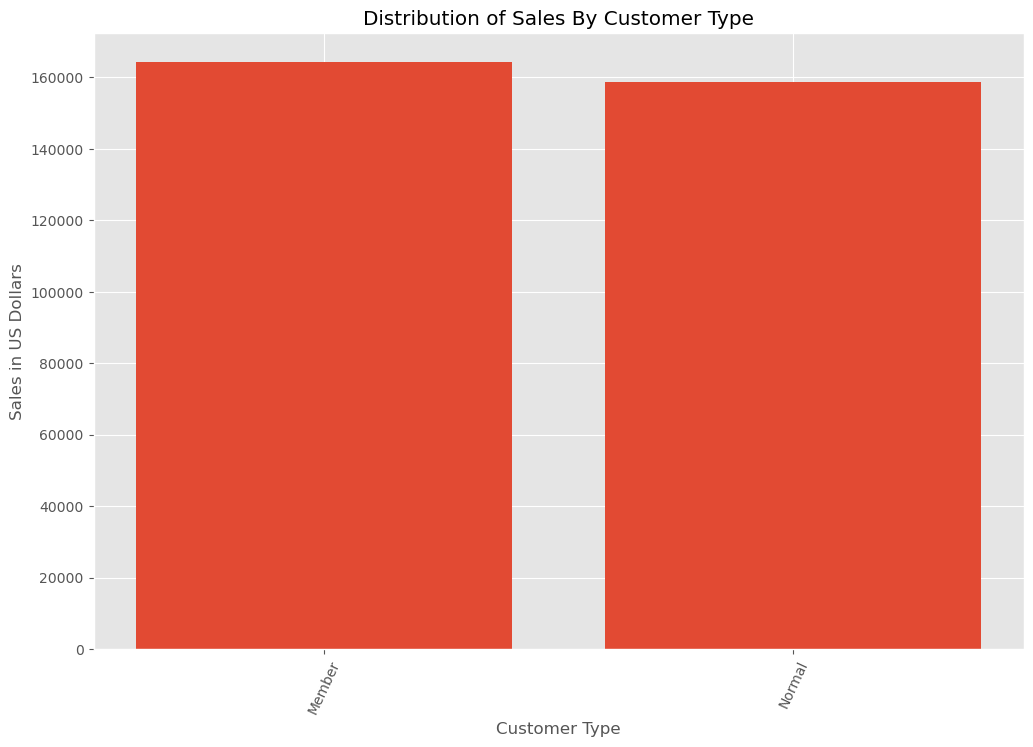

In [411]:
import matplotlib.pyplot as plt

customer_sales = all_data.groupby('Customer type')['Sales'].sum()

sales = customer_sales.values
customers = customer_sales.index


plt.bar(customers, sales)


plt.xticks(rotation=65)


plt.ylabel('Sales in US Dollars')
plt.xlabel('Customer Type')
plt.title('Distribution of Sales By Customer Type')


plt.show()

# 5. How does the average purchase amount differ between member and normal customers

In [412]:
all_data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month,Sales
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,1,548.9715
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,3,80.2200
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,3,340.5255
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,1,489.0480
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,2,634.3785


In [413]:
all_data['Date'] = pd.to_datetime(all_data['Date'])
purchase = all_data.groupby('Customer type')['Sales'].mean()
purchase

Customer type
Member    327.791305
Normal    318.122856
Name: Sales, dtype: float64

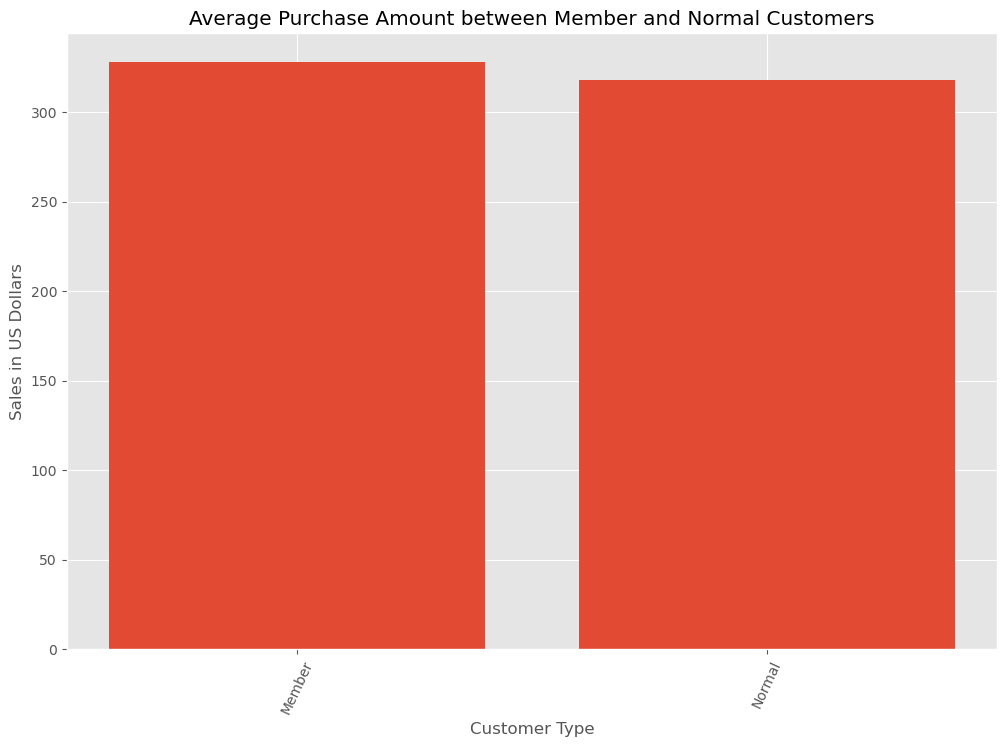

In [414]:
import matplotlib.pyplot as plt

average_sales = all_data.groupby('Customer type')['Sales'].mean()

sales = average_sales.values
customers = average_sales.index

plt.bar(customers, sales)


plt.xticks(rotation=65)


plt.ylabel('Sales in US Dollars')
plt.xlabel('Customer Type')
plt.title('Average Purchase Amount between Member and Normal Customers')


plt.show()

# 6. What are the most common payment methods used by customers?

In [415]:
all_data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month,Sales
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,1,548.9715
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,3,80.2200
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,3,340.5255
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,1,489.0480
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,2,634.3785


In [416]:
all_data['Date'] = pd.to_datetime(all_data['Date'])

payments = all_data.groupby('Payment')['Sales'].sum()

payments

Payment
Cash           112206.570
Credit card    100767.072
Ewallet        109993.107
Name: Sales, dtype: float64

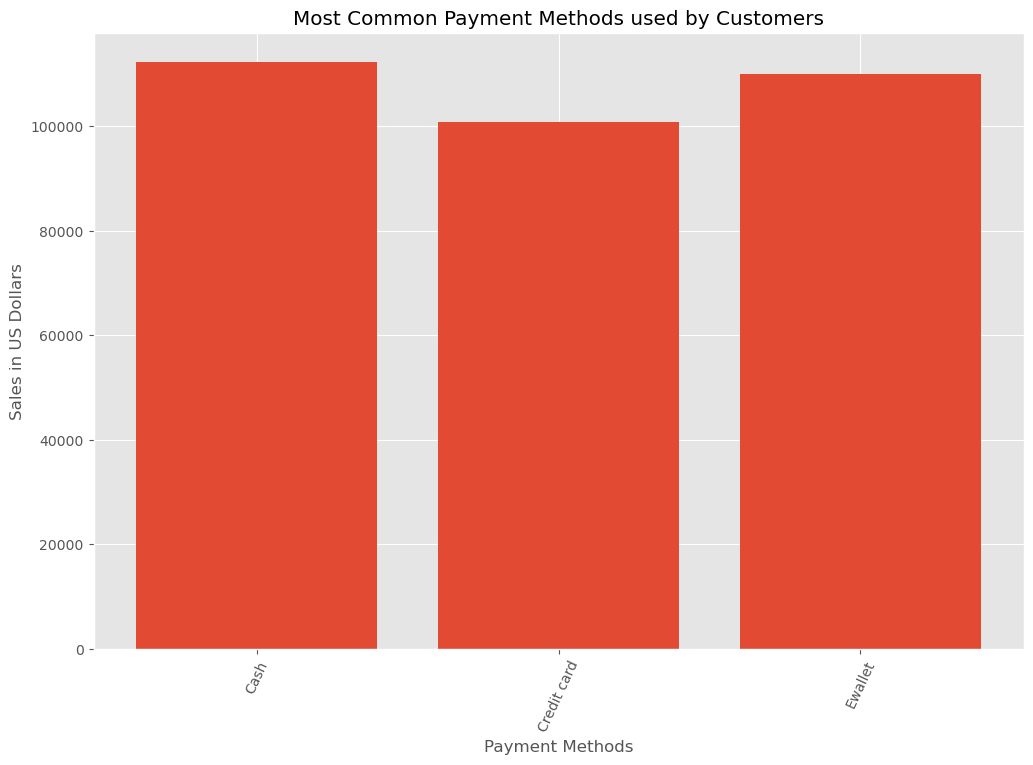

In [417]:
import matplotlib.pyplot as plt

common = all_data.groupby('Payment')['Sales'].sum()

sales = common.values
payment = common.index

plt.bar(payment, sales)

plt.xticks(rotation = 65)

plt.ylabel('Sales in US Dollars')
plt.xlabel('Payment Methods')
plt.title('Most Common Payment Methods used by Customers')


plt.show()

# 7. How does Sales Revenue vary across different store branches? Are there any Trends in Sales Performance based on store location or demographics? Which store has the highest and lowest sales revenue?

In [418]:
all_data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month,Sales
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,1,548.9715
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,3,80.2200
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,3,340.5255
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,1,489.0480
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,2,634.3785


In [419]:
all_data['Date'] = pd.to_datetime(all_data['Date'])

store_performance = all_data.groupby('Branch')['Sales'].sum()
store_performance

Branch
A    106200.3705
B    106197.6720
C    110568.7065
Name: Sales, dtype: float64

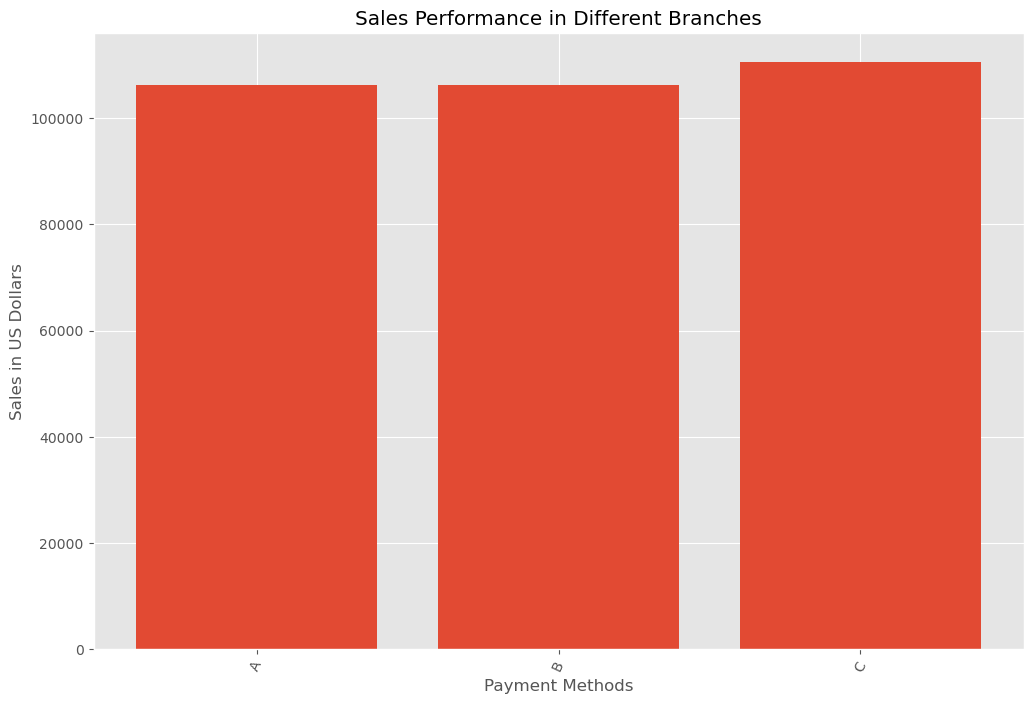

In [420]:
import matplotlib.pyplot as plt

stores = all_data.groupby('Branch')['Sales'].sum()

branch = stores.index
sales = stores.values

plt.bar(branch, sales)

plt.xticks(rotation = 65)

plt.ylabel('Sales in US Dollars')
plt.xlabel('Payment Methods')
plt.title('Sales Performance in Different Branches')


plt.show()

# 8. Customer Segmentation

In [421]:
all_data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month,Sales
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,1,548.9715
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,3,80.2200
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,3,340.5255
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,1,489.0480
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,2,634.3785


# Checking which gender mostly purchases products

In [422]:
all_data['Date'] = pd.to_datetime(all_data['Date'])

gender = all_data.groupby('Gender')['Sales'].sum()
gender

Gender
Female    167882.925
Male      155083.824
Name: Sales, dtype: float64

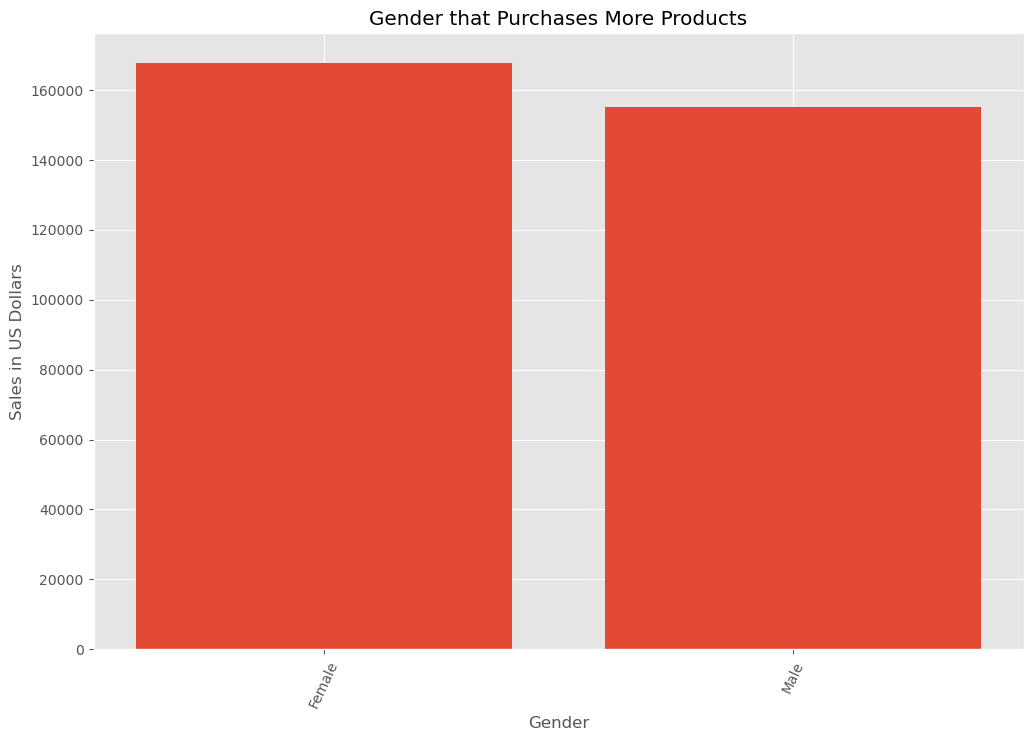

In [423]:
import matplotlib.pyplot as plt

stores = all_data.groupby('Gender')['Sales'].sum()

gender = stores.index
sales = stores.values

plt.bar(gender, sales)

plt.xticks(rotation = 65)

plt.ylabel('Sales in US Dollars')
plt.xlabel('Gender')
plt.title('Gender that Purchases More Products')


plt.show()

# How Much in Average A Male or Female Spends

In [424]:
all_data['Date'] = pd.to_datetime(all_data['Date'])

genders = all_data.groupby('Gender')['Sales'].mean()
genders

Gender
Female    335.095659
Male      310.789226
Name: Sales, dtype: float64

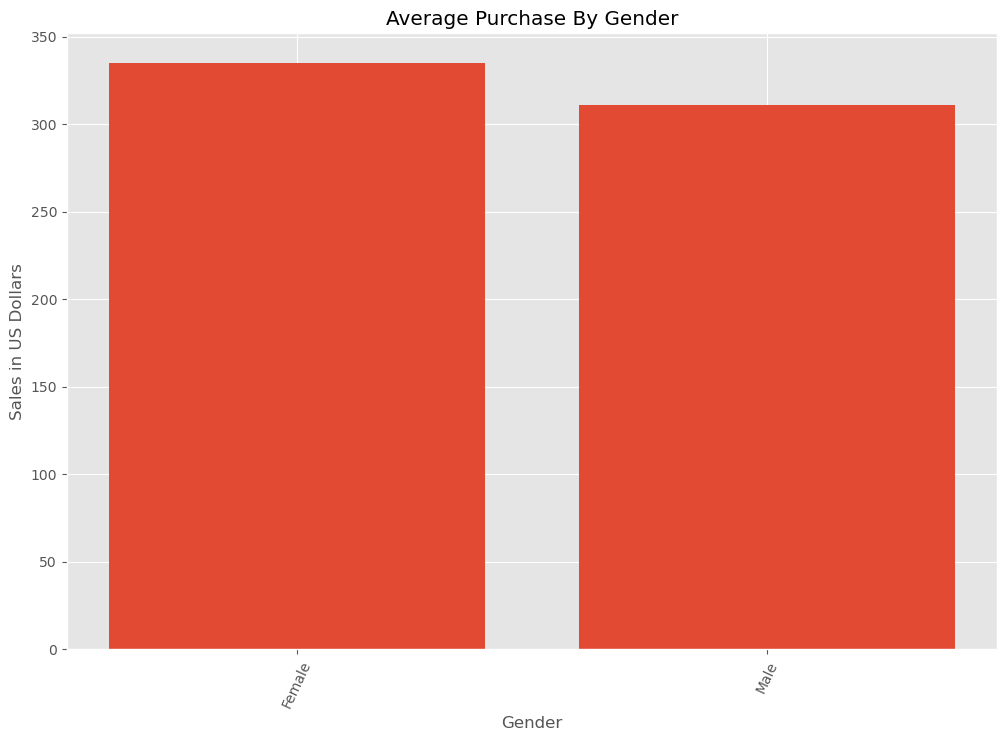

In [425]:
import matplotlib.pyplot as plt

stores = all_data.groupby('Gender')['Sales'].mean()

gender = stores.index
sales = stores.values

plt.bar(gender, sales)

plt.xticks(rotation = 65)

plt.ylabel('Sales in US Dollars')
plt.xlabel('Gender')
plt.title('Average Purchase By Gender')


plt.show()

# What hour do most customers purchase products

In [426]:
all_data['Time'] = pd.to_datetime(all_data['Time'])
all_data['Hour'] = all_data['Time'].dt.hour
all_data['Minute'] = all_data['Time'].dt.minute
all_data.head()

C:\Users\34661\AppData\Local\Temp\ipykernel_6512\3266637851.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data['Time'] = pd.to_datetime(all_data['Time'])


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month,Sales,Hour,Minute
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,2024-05-03 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,1,548.9715,13,8
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,2024-05-03 10:29:00,Cash,76.40,4.761905,3.8200,9.6,3,80.2200,10,29
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,...,2024-05-03 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,3,340.5255,13,23
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,...,2024-05-03 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,1,489.0480,20,33
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,...,2024-05-03 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,2,634.3785,10,37


In [427]:
all_data['Date'] = pd.to_datetime(all_data['Date'])

hours = all_data.groupby('Hour')['Sales'].count()
hours

Hour
10    101
11     90
12     89
13    103
14     83
15    102
16     77
17     74
18     93
19    113
20     75
Name: Sales, dtype: int64

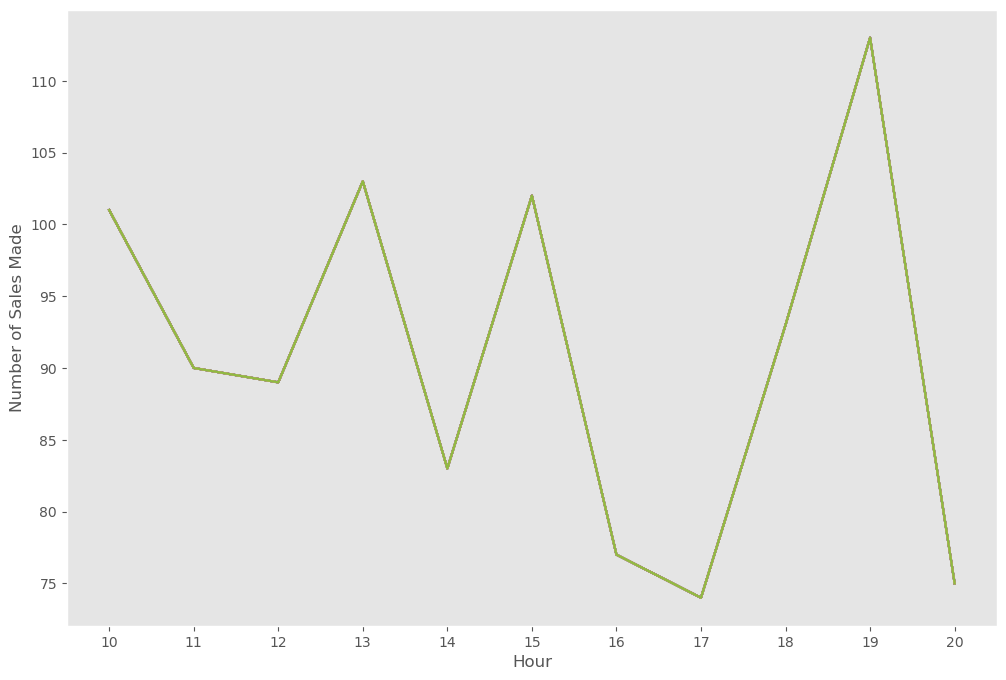

In [428]:
hours = [hour for hour, df in all_data.groupby('Hour')]

plt.plot(hours, all_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Number of Sales Made')
plt.grid()
plt.show()

In [429]:
all_data['Date'] = pd.to_datetime(all_data['Date'])
demo = all_data.groupby('City')['Branch'].count()
demo

City
Mandalay     332
Naypyitaw    328
Yangon       340
Name: Branch, dtype: int64

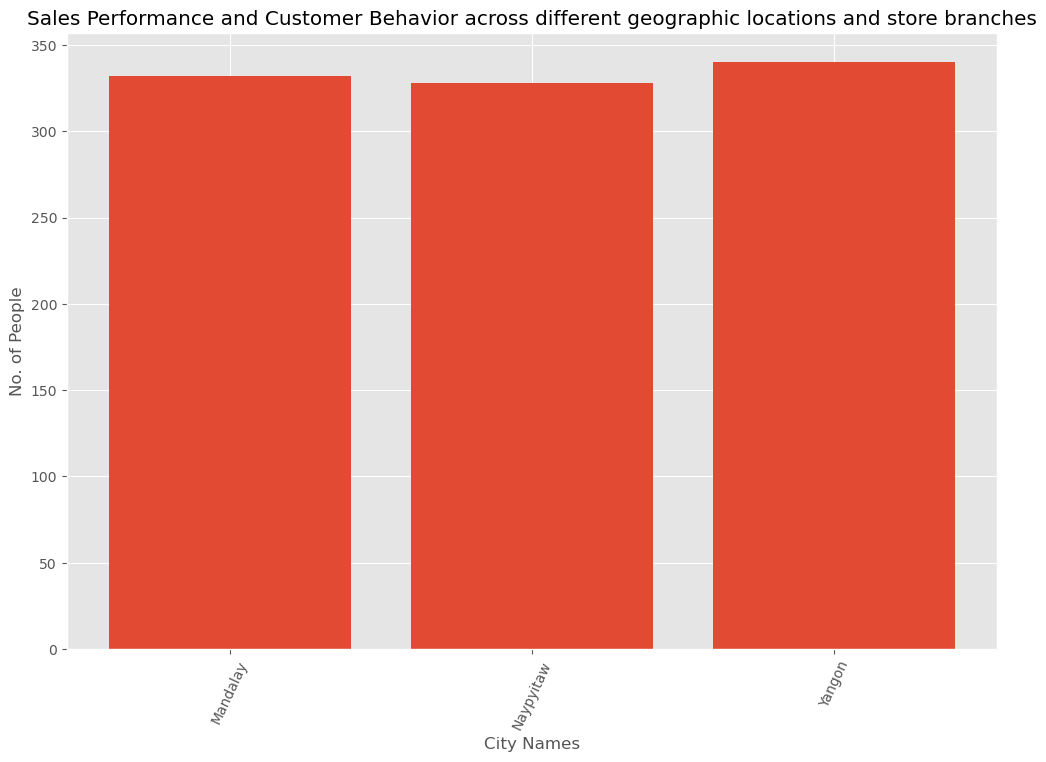

In [430]:
import matplotlib.pyplot as plt

population = all_data.groupby('City')['Branch'].count()

city = population.index
branch = population.values

plt.bar(city, branch)

plt.xticks(rotation = 65)

plt.ylabel('No. of People')
plt.xlabel('City Names')
plt.title('Sales Performance and Customer Behavior across different geographic locations and store branches')


plt.show()